In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
trainSet = pd.read_csv('Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv')
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [3]:
trainSetOpen = trainSet.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
trainSetScaled = sc.fit_transform(trainSetOpen)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60:i, 0])
    y_train.append(trainSetScaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)

In [4]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.05400437],
        [0.05148716],
        [0.03773165],
        ...,
        [0.04582785],
        [0.04002572],
        [0.03850823]],

       [[0.05148716],
        [0.03773165],
        [0.04386406],
        ...,
        [0.04002572],
        [0.03850823],
        [0.03932056]],

       [[0.03773165],
        [0.04386406],
        [0.03894562],
        ...,
        [0.03850823],
        [0.03932056],
        [0.03800839]],

       ...,

       [[0.98231691],
        [0.97794302],
        [0.99543867],
        ...,
        [0.53811549],
        [0.48369155],
        [0.48462887]],

       [[0.97794302],
        [0.99543867],
        [1.        ],
        ...,
        [0.48369155],
        [0.48462887],
        [0.53174205]],

       [[0.99543867],
        [1.        ],
        [0.98237946],
        ...,
        [0.48462887],
        [0.53174205],
        [0.54211448]]])

In [5]:
model = Sequential()
model.add(
    LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1))
)
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 48ms/step - loss: 0.0164
Epoch 2/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0023
Epoch 3/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0020
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0018
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0015
Epoch 6/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0014
Epoch 7/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0012
Epoch 10/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0012
Epoch 11/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0010
Epoch 12/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0012
Epoch 13/100
38/38 [=====

38/38 [==============================] - 2s 52ms/step - loss: 3.2893e-04
Epoch 98/100
38/38 [==============================] - 2s 51ms/step - loss: 2.7250e-04
Epoch 99/100
38/38 [==============================] - 2s 51ms/step - loss: 2.6264e-04
Epoch 100/100
38/38 [==============================] - 2s 51ms/step - loss: 2.8262e-04


In [6]:
testSet = pd.read_csv('Applied-Deep-Learning-with-Keras/Lesson09/AAPL_test.csv')
testSet.head()
actualStock = testSet.iloc[:, 1:2].values
testSet['Open']

0     154.889999
1     143.979996
2     144.529999
3     148.699997
4     149.559998
5     151.289993
6     152.500000
7     152.880005
8     150.850006
9     150.270004
10    153.080002
11    154.199997
12    157.500000
13    156.410004
14    154.149994
15    154.110001
16    155.479996
17    155.789993
18    156.250000
19    163.250000
20    166.110001
Name: Open, dtype: float64

In [7]:
trainSet['Open']

0        79.382858
1        78.980003
2        76.778572
3        77.760002
4        76.972855
           ...    
1253    148.149994
1254    148.300003
1255    155.839996
1256    157.500000
1257    158.529999
Name: Open, Length: 1258, dtype: float64

In [8]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),axis = 0
)

In [9]:
inputs = total[len(total) - len(testSet) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(
    X_test, 
    (X_test.shape[0], X_test.shape[1], 1)
)
predictedStock = model.predict(X_test)
predictedStock = sc.inverse_transform(predictedStock)

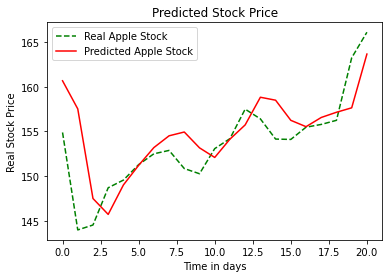

In [10]:
plt.plot(actualStock, color = 'green', label = 'Real Apple Stock', ls='--')
plt.plot(predictedStock, color = 'red', label = 'Predicted Apple Stock', ls='-')
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()